In [ ]:
!pip install sentence_transformers

In [1]:
# Sample sentences
sentences = [
    "The physician diagnoses patients in the clinic.",
    "The nurse administers medication to patients in the hospital.",
    "The dentist treats patients in the dental office.",
    "The veterinarian examines animals in the clinic.",
    "The instructor teaches students in the laboratory.",
    "The counselor guides students in the career center.",
    "The librarian assists patrons in the library.",
    "The dean oversees departments in the university.",
    "The software engineer develops applications in the office.",
    "The hardware engineer designs components in the lab.",
    "The cybersecurity analyst protects systems in the network operations center.",
    "The UX designer creates interfaces in the studio.",
    "I saw a beautiful tiger at the zoo.",
    "The lion roared loudly in the jungle.",
    "The elephant is the largest land animal.",
    "The monkey swings from trees in the rainforest.",
    "The concert was enjoyed by crowd.",
    "The movie is a thrilling adventure.",
    "The music is calming and relaxing.",
    "The painting is a masterpiece.",
]

/Users/zeeali/miniconda3/envs/myenv/lib/python3.9/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
/Users/zeeali/miniconda3/envs/myenv/lib/python3.9/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
T

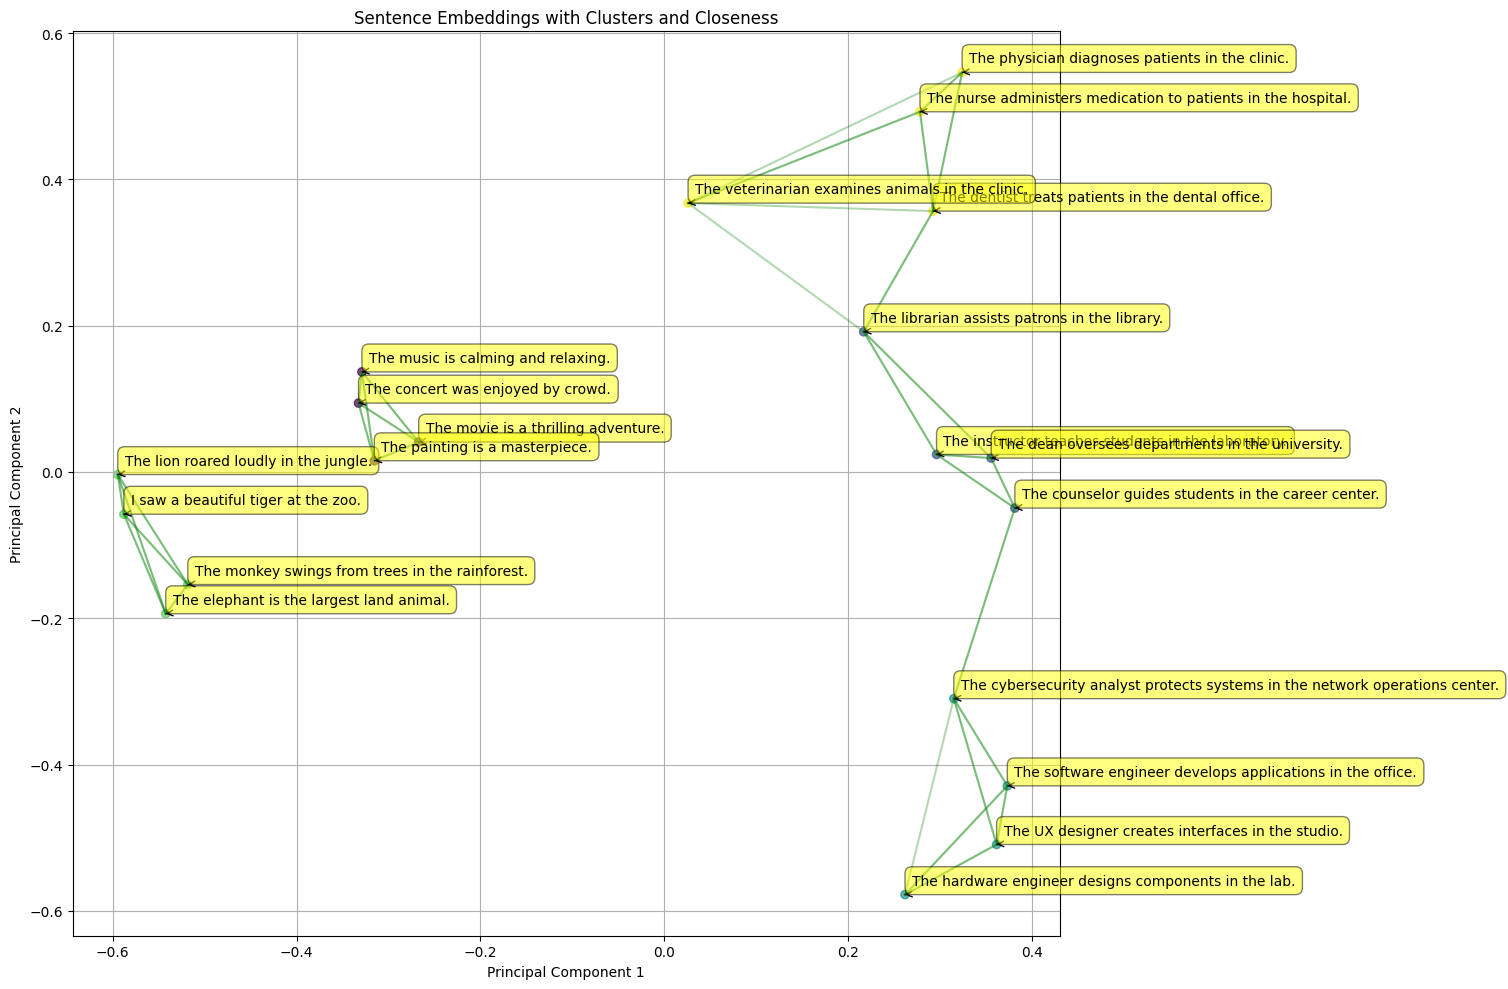

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Load a pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Get sentence embeddings
embeddings = model.encode(sentences)


# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Clustering (Optional) - comment out if you don't want clusters
kmeans = KMeans(n_clusters=5)  # Adjust number of clusters as needed
cluster_labels = kmeans.fit_predict(embeddings_2d)

# Highlighting Close Embeddings
# 1. Calculate pairwise distances
distances = np.linalg.norm(embeddings_2d[:, np.newaxis] - embeddings_2d[np.newaxis, :], axis=2)

# 2. Find closest neighbors for each point (excluding itself)
closest_neighbors = np.argsort(distances, axis=1)[:, 1:4]  # Top 3 closest neighbors (excluding itself)

# Plotting
plt.figure(figsize=(15, 10))

# Plot points with color based on clusters (if used)
if 'cluster_labels' in locals():
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
else:
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.7)


# # Plot lines connecting close points
for i, point in enumerate(embeddings_2d):
    for neighbor in closest_neighbors[i]:
        plt.plot([point[0], embeddings_2d[neighbor][0]], [point[1], embeddings_2d[neighbor][1]], 'g-', alpha=0.3)

# Annotations (optional)
for i, sentence in enumerate(sentences):
    plt.annotate(sentence,
                 (embeddings_2d[i, 0], embeddings_2d[i, 1]),
                 xytext=(5, 5),
                 textcoords='offset points',
                 ha='left',
                 va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.title('Sentence Embeddings with Closeness Visualization' if 'cluster_labels' not in locals() else 'Sentence Embeddings with Clusters and Closeness')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()